In [26]:

from sklearn.datasets import load_wine
wine = load_wine()
x = wine.data # 인풋으로 사용할 데이터
y = wine.target # 아웃풋, target으로 사용할 데이터
col_names = wine.feature_names # 인풋으로 사용할 데이터의 컬럼별 이름들

In [27]:

import matplotlib.pyplot as plt

import numpy as np

x.shape

(178, 13)

In [28]:

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2021 )

In [30]:
from sklearn.tree import DecisionTreeClassifier
trees = []
for i in range(1,16):
    tr = DecisionTreeClassifier(max_depth = i,min_samples_leaf=10, random_state = 2021)
    tr.fit(x_train,y_train)
    trees.append(tr)

In [31]:

from sklearn.metrics import accuracy_score
accs = []

for i in range(0,15):
    predicted = trees[i].predict(x_valid)
    accs.append(accuracy_score(y_valid, predicted)) 

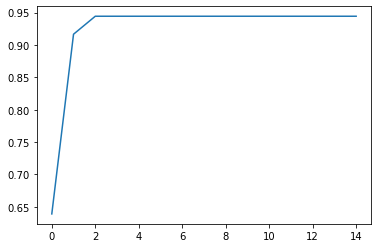

In [32]:

plt.plot(accs)
plt.show()
dep_m = accs.index(max(accs))


In [34]:

trees=[]
for i in range(5,16):
    tr = DecisionTreeClassifier(max_depth = dep_m,min_samples_leaf=i, random_state = 2021)
    trees.append(tr.fit(x_train,y_train))

In [35]:

accs = []
for i in range(0,10):
    predicted = trees[i].predict(x_valid)
    accs.append(accuracy_score(y_valid, predicted)) 


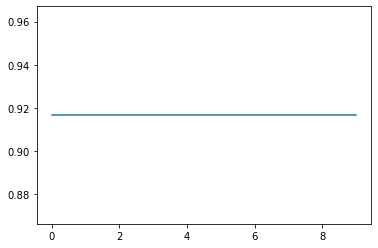

In [36]:

plt.plot(accs)
sam_m = accs.index(max(accs)) + 1

alcohol : 0, Score: 0.00000
malic_acid : 1, Score: 0.00000
ash : 2, Score: 0.02522
alcalinity_of_ash : 3, Score: 0.00000
magnesium : 4, Score: 0.00000
total_phenols : 5, Score: 0.00000
flavanoids : 6, Score: 0.50579
nonflavanoid_phenols : 7, Score: 0.00000
proanthocyanins : 8, Score: 0.00000
color_intensity : 9, Score: 0.46899
hue : 10, Score: 0.00000
od280/od315_of_diluted_wines : 11, Score: 0.00000
proline : 12, Score: 0.00000


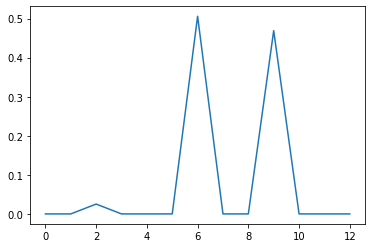

In [38]:

tr = DecisionTreeClassifier(max_depth = dep_m,min_samples_leaf=sam_m, random_state = 2021)
tr.fit(x_train,y_train)
# get importance
importance = tr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(col_names[i],': %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.plot([x for x in range(len(importance))], importance)
plt.show()


In [39]:

predicted = tr.predict(x_valid)
accuracy_score(y_valid, predicted)


0.9166666666666666

In [40]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping



# ### **Q13. 아래 조건에 맞추어 뉴럴네트워크 모델을 학습시키시기 바랍니다.**
# * **
# - Tensorflow framework를 사용한다.
# - 히든레이어는 아래와 같은 규칙에 맞추어 구성합니다.
#     * 2개 이상의 fully connected layer를 사용할 것
#     * Drop out 테크닉을 적절히 활용한다.
# - Early stopping을 이용하여, validation loss가 10번 이상 개선되지 않으면 학습을 중단 시키고, 가장 성능이 좋았을 때의 가중치를 복구한다.
# - 학습과정의 로그(loss, accuracy)를 history에 선언하여 남긴다.
# - y를 별도로 원핫인코딩 하지 않고 분류모델을 학습시킬 수 있도록 한다.(loss function을 sparse_categorical_crossentropy 로 사용한다)
# - epochs는 2000번을 지정한다.
# ---

# In[27]:

In [49]:

import os
#from keras.optimizers import Adam
from keras.optimizer_v2.adam import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['mse'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1
                                               )
history = model.fit(x_train, y_train, epochs=2000,  

                  verbose=1, validation_split=0.2,   

                 callbacks=[es,cp_callback])

model.load_weights(checkpoint_path)


Epoch 1/2000
4/4 [==============================] - 0s 31ms/step - loss: 35.5218 - mse: 1.1992 - val_loss: 20.7432 - val_mse: 1.0460

Epoch 00001: saving model to training_1\cp.ckpt
Epoch 2/2000
4/4 [==============================] - 0s 5ms/step - loss: 26.3239 - mse: 1.2084 - val_loss: 31.0058 - val_mse: 1.0460

Epoch 00002: saving model to training_1\cp.ckpt
Epoch 3/2000
4/4 [==============================] - 0s 5ms/step - loss: 21.5330 - mse: 1.2101 - val_loss: 14.2430 - val_mse: 1.0460

Epoch 00003: saving model to training_1\cp.ckpt
Epoch 4/2000
4/4 [==============================] - 0s 5ms/step - loss: 15.3289 - mse: 1.1992 - val_loss: 6.5230 - val_mse: 1.0278

Epoch 00004: saving model to training_1\cp.ckpt
Epoch 5/2000
4/4 [==============================] - 0s 5ms/step - loss: 11.4933 - mse: 1.1916 - val_loss: 8.2092 - val_mse: 1.0419

Epoch 00005: saving model to training_1\cp.ckpt
Epoch 6/2000
4/4 [==============================] - 0s 5ms/step - loss: 10.1458 - mse: 1.1859 - 

In [48]:
y_train


array([1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2,
       0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2,
       1, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1,
       2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1,
       2, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [50]:

# 여기에 답안코드를 작성하세요


# ### **Q14. 다음 조건에 맞추어 뉴럴네트워크의 학습 로그를 시각화 하시기 바랍니다.**
# * **
# - 필요한 라이브러리가 있다면 따로 불러온다.
# - epochs에 따른 loss의 변화를 시각화 한다.
# - train loss와 validation loss를 전부 시각화하고, 구별가능해야 한다.
# - 그래프의 타이틀은 'Loss'로 표시한다.
# - x축에는 'epochs'라고 표시하고 y축에는 'Loss'라고 표시한다.
# - 위에서 학습한 머신러닝 모델과 성능을 비교해보시오. 
# ---

# In[28]:



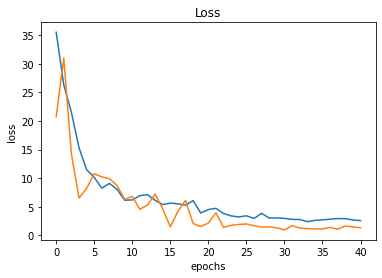

In [51]:

h = history
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel("loss")
plt.show()